<a href="https://colab.research.google.com/github/soninote/BigDataStudy/blob/master/%EA%B3%B5%EA%B3%B5%EB%8D%B0%EC%9D%B4%ED%84%B0_API_%ED%99%9C%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 출입국 통계 분석

##1.1  2021년 5월 중국인 입국자 수 알기

In [ ]:
import requests as rq
from bs4 import BeautifulSoup as bs
import pandas as pd

url = 'http://openapi.tour.go.kr/openapi/service/EdrcntTourismStatsService/getEdrcntTourismStatsList?'
user_key = 'serviceKey=YourKey'
params = '&YM=201201&NAT_CD=112&ED_CD=E'

urlAPI = url + user_key + params

resp = rq.get(urlAPI)
soup = bs(resp.content, 'html.parser')
#number = int(soup.select_one('num').text)

number

##1.2  2018년부터 2021년 까지 매년 3월, 6월 및 9월의 입국자수 (중국, 일본, 미국)

In [9]:
from google.colab import drive
drive.mount('/gdrive', force_remount = True)

Mounted at /gdrive


In [11]:
import requests as rq
from bs4 import BeautifulSoup as bs
import pandas as pd

url = 'http://openapi.tour.go.kr/openapi/service/EdrcntTourismStatsService/getEdrcntTourismStatsList?'
user_key = 'serviceKey=YourKey'

yearMonth = ['201703', '201706','201709',
             '201803', '201806','201809',
             '201903', '201906','201909',
             '202003', '202006','202009',
             '202103', '202106','202109']

nationCode = ['112','130','275']

def getNumberArrivals(natCode):
  number = []
  for ym in yearMonth:
      params = '&YM='+ym+'&NAT_CD='+natCode+'&ED_CD=E'
      urlAPI = url + user_key + params
      resp = rq.get(urlAPI)
      soup = bs(resp.content, 'html.parser')
      num = soup.select_one('num').text
      number.append(int(num))
  return number

enterence = []
for i in range(len(nationCode)):
  number = getNumberArrivals(nationCode[i])
  enterence.append(number)
  print(number)

df = pd.DataFrame({'중국':enterence[0], '일본':enterence[1], '미국':enterence[2]},
                  index = yearMonth)

df.to_excel('/gdrive/MyDrive/미중일입국자수현황.xlsx')

[360782, 254930, 318682, 403413, 379891, 434595, 487623, 475007, 541350, 16595, 5051, 15307, 18980, 12942, 19144]
[274478, 167785, 219968, 294476, 235293, 247847, 375119, 282476, 251119, 8347, 498, 794, 949, 875, 1142]
[72477, 85955, 70933, 80079, 94742, 78826, 84275, 105398, 90819, 10570, 9717, 12426, 12321, 18159, 19227]


# 2.연도별 전국 산불 발생 통계 분석

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,760 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


['부산', '광주', '전남', '인천', '경기', '경남', '강원', '대구', '대전', '전북', '충북', '경북', '서울', '충남', '울산']
[6, 1, 33, 8, 73, 36, 48, 8, 4, 23, 8, 60, 4, 24, 11]


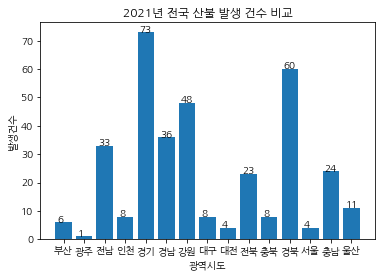

In [ ]:
import requests as rq
from bs4 import BeautifulSoup as bs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

site = 'https://apis.data.go.kr/1400000/forestStusService/getfirestatsservice'
user_key = '?serviceKey=YourKey'
params = '&numOfRows=348&pageNo=1&searchStDt=20210101&searchEdDt=20211231'

url = site + user_key + params

# SSLCertVerificationError  verify=False 넣어줘야함
res = rq.get(url, verify=False)
res.content
soup = bs(res.content, 'html.parser')

sido = soup.select('locsi')

sigungu = soup.select('locgungu')
eupmyondong = soup.select('locdong')
month = soup.select('startmonth')
startDay = soup.select('startday')
endDay = soup.select('endday')
damageArea = soup.select('damagearea')
cause = soup.select('firecause')

sidoList = []
sigunguList = []
eupmyondongList = []
monthList = []
startDayList = []
endDayList = []
damageAreaList = []
causeList = []

for i in range(len(sido)):
  sidoList.append(sido[i].text)
  sigunguList.append(sigungu[i].text)
  eupmyondongList.append(eupmyondong[i].text)
  monthList.append(month[i].text)
  startDayList.append(startDay[i].text)
  endDayList.append(endDay[i].text)
  damageAreaList.append(damageArea[i].text)
  causeList.append(cause[i].text)

df = pd.DataFrame({'월':monthList, '발생일': startDayList, '진화완료일' : endDayList, '시도':sidoList ,'시군구': sigunguList, '읍면동': eupmyondongList,'피해면적':damageAreaList, '발화원인': causeList})
#df.to_excel('/gdrive/MyDrive/산불화재발생현황.xlsx')



wideLoc = list(set(sidoList))
locCount = [0 for i in range(len(wideLoc))]
for i in range(len(wideLoc)):
  locCount[i] = sidoList.count(wideLoc[i])
print(wideLoc)
print(locCount)

plt.rcParams['font.family'] = 'NanumGothic'
x = np.arange(len(wideLoc))

plt.title('2021년 전국 산불 발생 건수 비교')
plt.xlabel('광역시도')
plt.ylabel('발생건수')
plt.bar(x,locCount)
plt.xticks(x,wideLoc)

for i in x:
  plt.text(i-0.3, locCount[i], locCount[i])
plt.show()

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


['쓰레기소각', '기타', '담뱃불실화', '주택화재비화', '입산자실화']
[28, 143, 31, 18, 127]


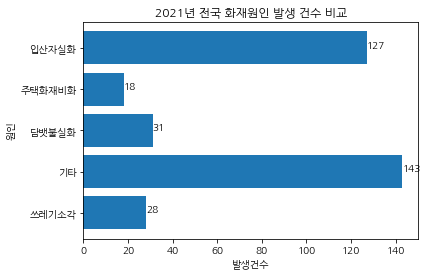

In [7]:
import requests as rq
from bs4 import BeautifulSoup as bs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

site = 'https://apis.data.go.kr/1400000/forestStusService/getfirestatsservice'
user_key = '?serviceKey=YourKey'
params = '&numOfRows=348&pageNo=1&searchStDt=20210101&searchEdDt=20211231'

url = site + user_key + params

# SSLCertVerificationError  verify=False 넣어줘야함
res = rq.get(url, verify=False)
res.content
soup = bs(res.content, 'html.parser')

sido = soup.select('locsi')

sigungu = soup.select('locgungu')
eupmyondong = soup.select('locdong')
month = soup.select('startmonth')
startDay = soup.select('startday')
endDay = soup.select('endday')
damageArea = soup.select('damagearea')
cause = soup.select('firecause')

sidoList = []
sigunguList = []
eupmyondongList = []
monthList = []
startDayList = []
endDayList = []
damageAreaList = []
causeList = []

for i in range(len(sido)):
  sidoList.append(sido[i].text)
  sigunguList.append(sigungu[i].text)
  eupmyondongList.append(eupmyondong[i].text)
  monthList.append(month[i].text)
  startDayList.append(startDay[i].text)
  endDayList.append(endDay[i].text)
  damageAreaList.append(damageArea[i].text)
  causeList.append(cause[i].text)

df = pd.DataFrame({'월':monthList, '발생일': startDayList, '진화완료일' : endDayList, '시도':sidoList ,'시군구': sigunguList, '읍면동': eupmyondongList,'피해면적':damageAreaList, '발화원인': causeList})
#df.to_excel('/gdrive/MyDrive/산불화재발생현황.xlsx')



wideCause = list(set(causeList))
locCount = [0 for i in range(len(wideCause))]
for i in range(len(wideCause)):
  locCount[i] = causeList.count(wideCause[i])
print(wideCause)
print(locCount)

plt.rcParams['font.family'] = 'NanumGothic'
x = np.arange(len(wideCause))

plt.title('2021년 전국 화재원인 발생 건수 비교')
plt.xlabel('발생건수')
plt.ylabel('원인')
plt.barh(x,locCount)
plt.yticks(x, wideCause)

for i in x:
  plt.text(locCount[i], i, locCount[i])
plt.show()